In [21]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
autos = pd.read_csv(url, header=None, na_values=["?"])
autos.shape

(205, 26)

In [34]:
autos.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
           "drive-wheels", "engine-location","wheel-base", "length", "width", "height", "curb-weight", "engine-type",
          "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
          "peak-rpm", "city-mpg", "highway-mpg", "price"]
autos.columns = columns
autos.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [26]:
grouped = autos[["body-style","length", "width"]].groupby("body-style")
grouped.mean()

,length,width
body-style,,
convertible,170.383333,65.583333
hardtop,176.937500,66.612500
hatchback,166.592857,65.247143
sedan,177.585417,66.260417
wagon,181.304000,66.256000


In [11]:
autos["curb-weight"].describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weight, dtype: float64

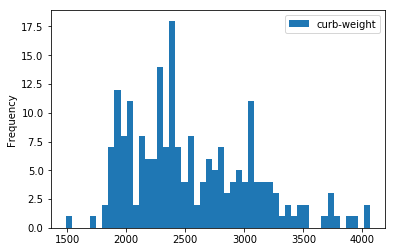

In [27]:
%matplotlib inline
autos.plot(y="curb-weight", kind="hist", bins=50)

In [25]:
from scipy import stats
stats.normaltest(autos["curb-weight"])
stats.skewtest(autos["curb-weight"])

SkewtestResult(statistic=3.7529736401776308, pvalue=0.00017474923665266025)

drive-wheels
4wd    AxesSubplot(0.125,0.125;0.775x0.755)
fwd    AxesSubplot(0.125,0.125;0.775x0.755)
rwd    AxesSubplot(0.125,0.125;0.775x0.755)
Name: curb-weight, dtype: object

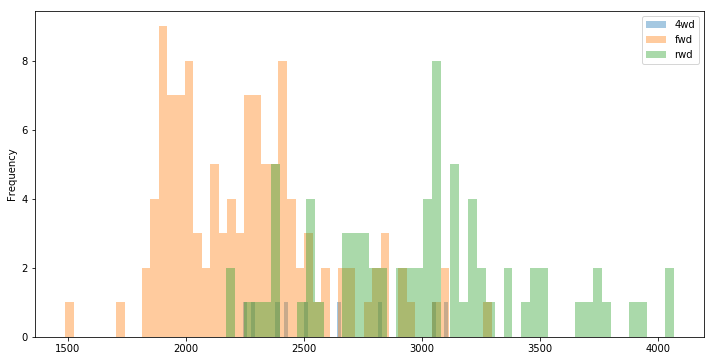

In [58]:
motor = autos.groupby("drive-wheels")["curb-weight"]
motor.plot(kind='hist', bins=50, figsize=[12,6], alpha=.4, legend=True)

In [55]:
def check_normal(x):
    if len(x) > 8:
        return stats.normaltest(x)
    else:
        return 0

motor.apply(check_normal)

C:\ProgramData\Anaconda\envs\py36\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


drive-wheels
4wd       (1.44935665859, 0.48448038704)
fwd    (10.5736136239, 0.00505788527978)
rwd      (1.67470474799, 0.432855045902)
Name: curb-weight, dtype: object

In [35]:
autos.groupby("num-of-cylinders").size()


num-of-cylinders
eight       5
five       11
four      159
six        24
three       1
twelve      1
two         4
dtype: int64

In [20]:
autos["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)